# Data Science and Business Analytics Intern at The Sparks Foundation

## Author: Saumya Gupta

### From the given iris dataset to predict the optimum number of clusters and represent it visually

About Iris dataset: 
The iris dataset contains four features namely Sepal length, Sepal width, Petal length and Petal width of 50 samples of three species: Setosa, Versicolor and Virginica.

#### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

#### Load tha data

In [7]:
data=pd.read_csv('iris.csv')
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

### Visualizing data

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
data.shape

(150, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
# Now we will drop the columns of Species and Id 
iris_data=data.copy()
iris_data=data.drop(columns=['Species','Id'])
print(iris_data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


### Let's have a look at our data through a scatter plot`

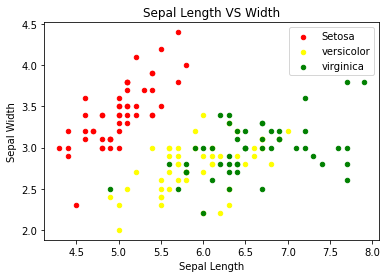

In [17]:
# Scatter plot of Sepal Length Vs Sepal Width of all the three species 
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='yellow', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica',ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
plt.show()

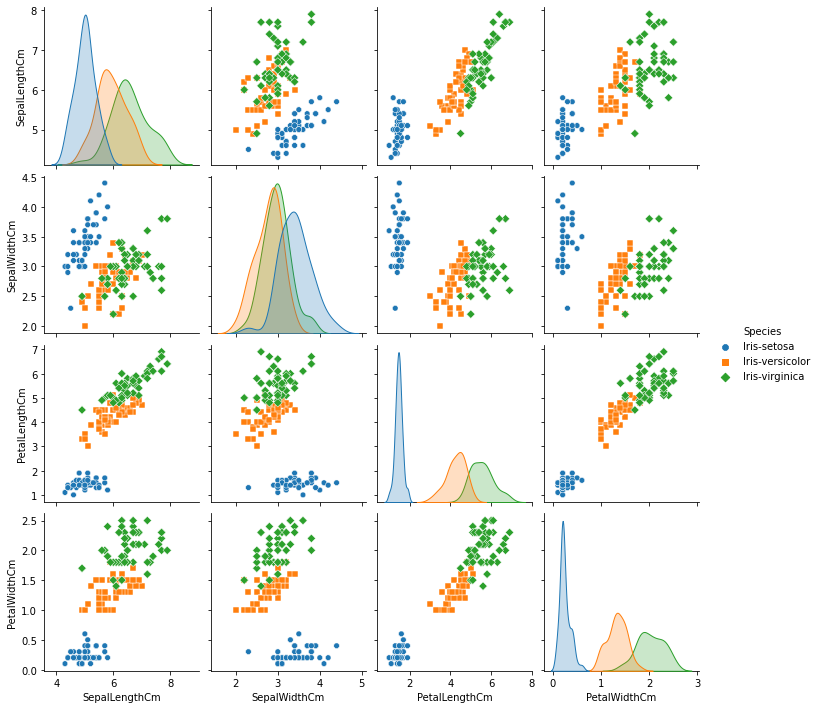

In [25]:
sns.pairplot(data.drop(columns=['Id'],axis=1), hue='Species', height=2.5, markers = ["8","s","D"])

###### Observations:
###### Joint distrubution in the triangles
###### Marginal distribution in the slant line
###### 'Setosa' has extremly short petal width 
###### 'Virginica have high sepal length

### Using the Elbow Method to estimate the value of k

In [42]:
# Now first we assign the arbitrary value of k as 5
kmeans5 = KMeans(n_clusters=5,init = 'k-means++', random_state = 0)
y = kmeans5.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


In [23]:
kmeans5.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.24722222, 2.84722222, 4.775     , 1.575     ]])

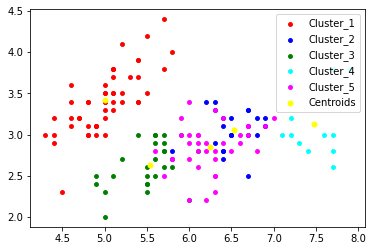

In [43]:
#x[y==0,0] finds all the rows of x that have a y value of 0 (y == 0), and are in the first column i.e Sepal Length
# Similarly  x[y==0,1] finds all the rows of x that have a y value of 0 (y == 0), and are in the second column i.e Sepal Width
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(x[y == 3,0], x[y==3,1], s = 15, c= 'cyan', label = 'Cluster_4')
plt.scatter(x[y == 4,0], x[y==4,1], s = 15, c= 'magenta', label = 'Cluster_5')

plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

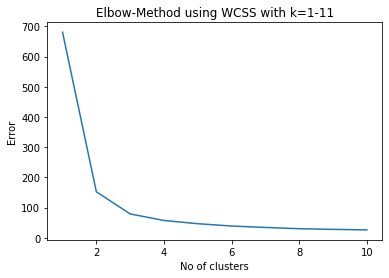

In [25]:
# Elbow method using Within Cluster Sum of Squares
Error =[]
for i in range(1, 11):
    kmeans11 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    kmeans11.fit(x)
    Error.append(kmeans11.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow-Method using WCSS with k=1-11')
plt.xlabel('No of clusters')
plt.ylabel('Error') #within cluster sum of squares
plt.show()

##### As we can see above in the graph that the shape of elbow is approximately formed at k=3 This is when the WCSS doesn't decrease significantly at every iteration.

### Now we fit our k means clustering model to three clusters

In [44]:
# We assign the value of k as 3 
kmeans3 = KMeans(n_clusters=3, random_state=21)
y = kmeans3.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Identifying the center of points of the data

In [27]:
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualizing the clusters along with their centroids

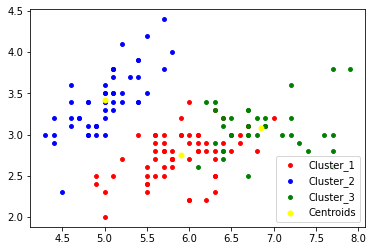

In [48]:
#x[y==0,0] finds all the rows of x that have a y value of 0 (y == 0), and are in the first column i.e Sepal Length
#x[y==0,1] finds all the rows of x that have a y value of 0 (y == 0), and are in the second column i.e Sepal Width
#x[y == 1,0] finds all the rows of x that have a y value of 1 (y == 1), and are in the first column i.e Sepal Length
#x[y==1,1] finds all the rows of x that have a y value of 1 (y == 1), and are in the second column i.e Sepal Width
#x[y==2,0] finds all the rows of x that have a y value of 2 (y == 0), and are in the first column i.e Sepal Length
#x[y==2,1] finds all the rows of x that have a y value of 2 (y == 0), and are in the second column i.e Sepal Width
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')

plt.legend()

plt.show()